In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import gensim
import gensim.downloader as api

import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

import sklearn
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics

#machine learning model_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
model_pipeline=[]
model_pipeline.append(LogisticRegression(solver = 'liblinear'))
model_pipeline.append(SVC(C = 100.0))
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())
model_pipeline.append(GaussianNB())

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/DA/data/train.csv')
train_df.head()

,title,text,subject,date,label,year
0,arizona gop poised ban social justice classes ...,another day another assault first amendment fr...,News,"January 14, 2017",0,2017
1,trump tells supporters he’ll enact law actuall...,one would think donald trump would learned les...,News,"June 22, 2017",0,2017
2,us senate vote montenegros nato membership,washington reuters us senate vote next week ra...,politicsNews,"March 23, 2017",1,2017
3,paul craig roberts ‘by cooperating washington ...,paul crag robertsa month ago wrote column hesi...,US_News,"October 26, 2016",0,2016
4,president trump tweets perfect new years messa...,comes close like acknowledge gratitude preside...,politics,"Dec 31, 2017",0,2017


In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/DA/data/test.csv')
test_df.head()

,title,text,subject,date,label
0,WATCH: Bernie Sanders Makes MAJOR Announcemen...,The mood at Democratic presidential hopeful Be...,News,"March 27, 2016",0
1,Trump renews threat to scrap NAFTA going into ...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"August 27, 2017",1
2,Minor train disruption rattles Singapore's rep...,SINGAPORE (Reuters) - Singapore is grappling w...,worldnews,"November 9, 2017",1
3,"Factbox: Who are Britain First, whose leader's...",LONDON (Reuters) - U.S. President Donald Trump...,worldnews,"November 29, 2017",1
4,The Los Angeles Times Endorses Hillary Clinto...,As Politico reports an almost neck-and-neck ra...,News,"May 30, 2016",0


In [ ]:
X_train = train.text.values
y_train = train.label.values
X_test = test.text.values
y_test = test.label.values

In [ ]:
X_train = TfidfVectorizer().fit_transform(X_train)
X_test = TfidfVectorizer().fit_transform(X_test)
X_train = X_train.toarray()
X_test = X_test.toarray()

In [ ]:
#word embeddings using Glove
glove_gensim  = api.load('glove-wiki-gigaword-300')
vocab = glove_gensim.wv.vocab

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#extracting maximum token length
maxi = -1
for i, rev in enumerate(train['text']):
    tokens = rev.split()
    if(len(tokens) > maxi):
        maxi = len(tokens)
maxi

3437

In [ ]:
#tokenizing the news article
tokenizer = Tokenizer()
df_total = pd.concat([train['text'], test['text']], axis = 0)
tokenizer.fit_on_texts(df_total)

In [ ]:
max_rev_len = maxi  
vocab_size = len(tokenizer.word_index) + 1
embed_dim = 300

In [ ]:
#padding the tokinized news articles
X_train = tokenizer.texts_to_sequences(train['text'])  
X_train_pad = pad_sequences(X_train, maxlen = max_rev_len, padding = 'post')
X_test = tokenizer.texts_to_sequences(test['text'])  
X_test_pad = pad_sequences(X_test, maxlen = max_rev_len, padding = 'post')

In [ ]:
model_list = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes']
acc_list = []
auc_list = []
cm_list = []
class_report = []
for model in model_pipeline:
    model.fit(X_train_pad, y_train)
    y_pred = model.predict(X_test_pad)
    acc_list.append(metrics.accuracy_score(y_test, y_pred))
    fpr , tpr , _thresholds = metrics.roc_curve(y_test, y_pred)
    auc_list.append(round(metrics.auc(fpr, tpr), 2))
    class_report.append(classification_report(y_test, y_pred))
    cm_list.append(confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
for i in range(len(class_report)):
  print(model_list[i] + ":")
  print(class_report[i] + "\n\n")

Logistic Regression:
              precision    recall  f1-score   support

           0       0.55      0.55      0.55       217
           1       0.47      0.47      0.47       187

    accuracy                           0.51       404
   macro avg       0.51      0.51      0.51       404
weighted avg       0.51      0.51      0.51       404



SVM:
              precision    recall  f1-score   support

           0       0.56      0.42      0.48       217
           1       0.48      0.61      0.54       187

    accuracy                           0.51       404
   macro avg       0.52      0.52      0.51       404
weighted avg       0.52      0.51      0.51       404



KNN:
              precision    recall  f1-score   support

           0       0.58      0.22      0.32       217
           1       0.47      0.82      0.60       187

    accuracy                           0.50       404
   macro avg       0.53      0.52      0.46       404
weighted avg       0.53      0.50      

In [ ]:
result_df = pd.DataFrame({'Model': model_list, 'Accuracy': acc_list, 'AUC': auc_list})
result_df

,Model,Accuracy,AUC
0,Logistic Regression,0.512376,0.51
1,SVM,0.509901,0.52
2,KNN,0.495050,0.52
3,Decision Tree,0.960396,0.96
4,Random Forest,0.547030,0.56
5,Naive Bayes,0.435644,0.46


Naive Bayes
[[120  97]
 [100  87]]

Logistic Regression
[[ 92 125]
 [ 73 114]]

SVM
[[ 47 170]
 [ 34 153]]

KNN
[[206  11]
 [  5 182]]

Decision Tree
[[ 71 146]
 [ 37 150]]

Random Forest
[[ 17 200]
 [ 28 159]]



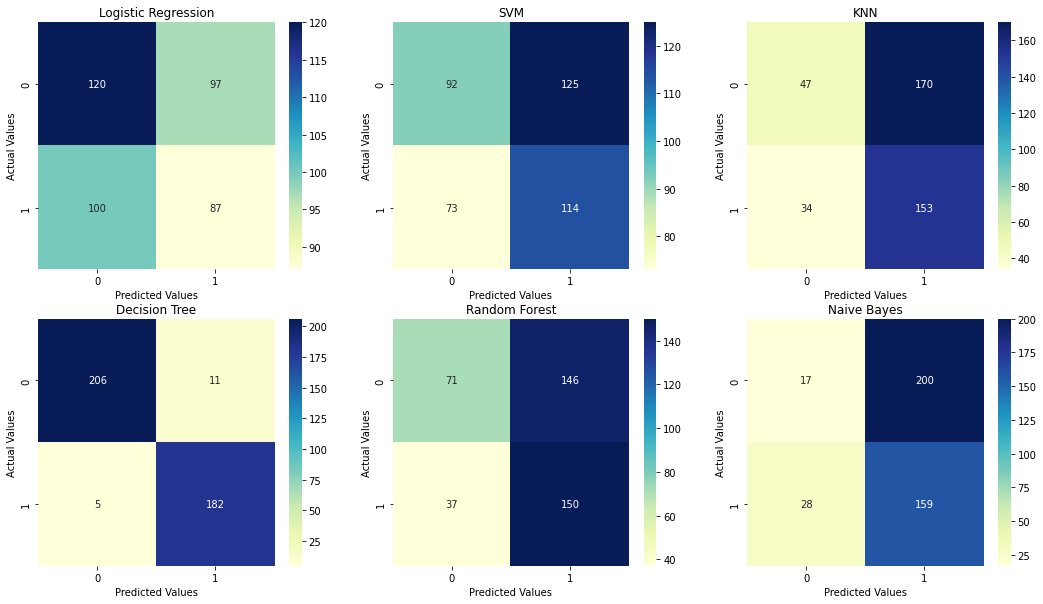

In [ ]:
fig = plt.figure(figsize = (18, 10))
for i in range(len(cm_list)):
   cm = cm_list[i]
   print(model)
   print(cm)
   print()
   model = model_list[i]
   sub = fig.add_subplot(2, 3, i+1).set_title(model)
   #cm_plot = sns.heatmap(cm, annot = True, cmap = 'Blues_r')
   cm_plot = sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'YlGnBu')
   cm_plot.set_xlabel('Predicted Values')
   cm_plot.set_ylabel('Actual Values')